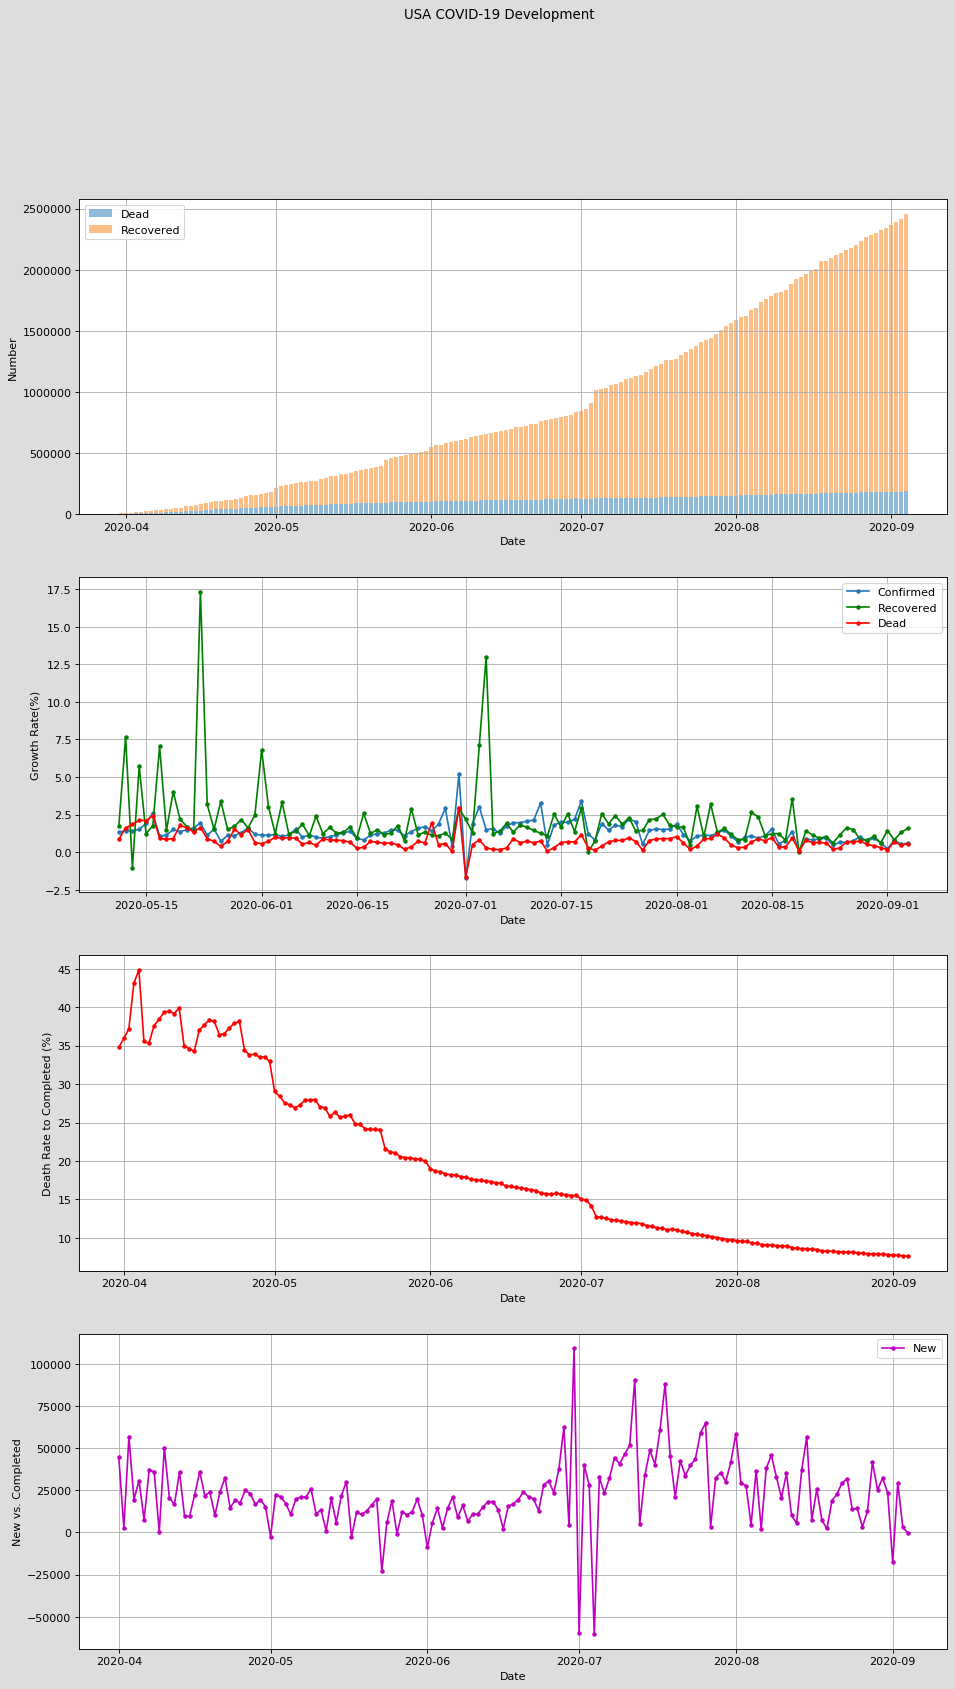

In [58]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def growth(ser):
    new = pd.Series(ser.iloc[1:].array)
    old = pd.Series(ser.iloc[:-1].array)
    delta = new - old
    return delta

def growth_pcnt(ser):
    new = pd.Series(ser.iloc[1:].array)
    old = pd.Series(ser.iloc[:-1].array)
    delta = new - old
    return delta / old * 100
 
cvusa_data = pd.read_csv('cv-dev-usa.csv')

plt.figure(num=None, figsize=(14,24), dpi=80, facecolor='#dddddd', edgecolor='k')

dates = pd.to_datetime(cvusa_data.Date)

dead = cvusa_data.Dead
recovered = cvusa_data.Recovered
confirmed = cvusa_data.Confirmed
total = cvusa_data.Dead + cvusa_data.Recovered
#
dates_dlt = pd.Series(dates[1:].array)

curr_row = 1
plt.subplot(4, 1, curr_row)

plt.bar(dates, dead, align='center', alpha=0.5)
plt.bar(dates, recovered, bottom=dead, align='center', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Number")
plt.legend([ "Dead", "Recovered"])
plt.grid()
#
curr_row += 1
plt.subplot(4, 1, curr_row)
#
shift_days = 40
dtd = pd.Series(dates_dlt.iloc[shift_days:].array)

plt.plot(dtd, growth_pcnt(pd.Series(confirmed.iloc[shift_days:].array)), ".-")
plt.plot(dtd, growth_pcnt(pd.Series(recovered.iloc[shift_days:].array)), ".-g")
plt.plot(dtd, growth_pcnt(pd.Series(dead.iloc[shift_days:].array)), ".-r")
plt.xlabel("Date")
plt.ylabel("Growth Rate(%)")
plt.legend(["Confirmed", "Recovered", "Dead"])
plt.grid()
#
curr_row += 1
plt.subplot(4, 1, curr_row)
#
death_pcnt = dead / total * 100.0
plt.plot(dates, death_pcnt, ".-r")
plt.xlabel("Date")
plt.ylabel("Death Rate to Completed (%)")
plt.grid()
#
curr_row += 1
plt.subplot(4, 1, curr_row)

confirmed_new = growth(confirmed)
completed_new = growth(dead) + growth(recovered)
real_growth = confirmed_new - completed_new
plt.plot(dates_dlt, real_growth, ".-m")
plt.xlabel("Date")
plt.ylabel("New vs. Completed")
plt.legend(["New", "Completed"])
plt.grid()
# real_growth.rolling(10).mean().plot(grid=True)
#
plt.suptitle("USA COVID-19 Development")
plt.show()


Date
2020-08-26    1.974891
2020-08-27    1.983970
2020-08-28    1.917762
2020-08-29    2.049727
2020-08-30    2.162078
2020-08-31    2.044209
2020-09-01    2.086184
2020-09-02    2.045788
2020-09-03    1.888789
2020-09-04    1.888549
dtype: float64


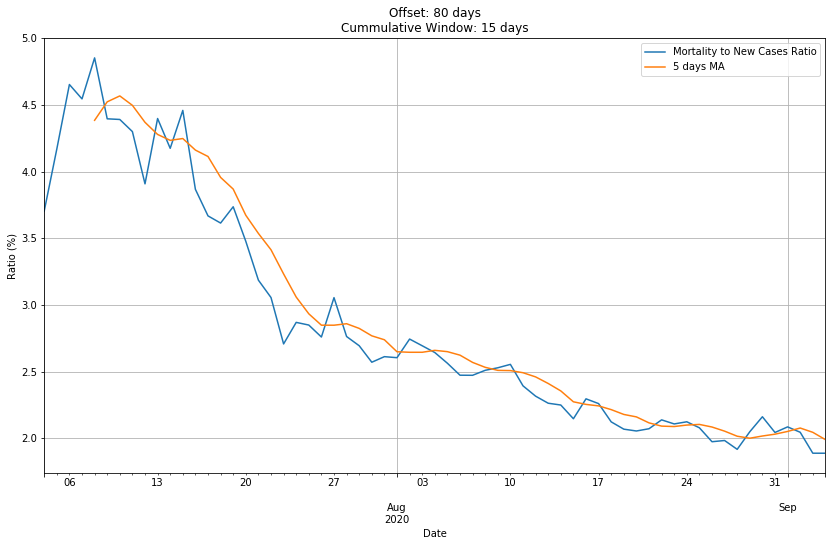

In [146]:
# Number of Deathes/Number of New Cases Ratio
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def mortalityToNewCasesRatio(confirmed : pd.Series
                             , dead : pd.Series
                             , cummDaysWindow : int
                             , offsetDays : int):
    # accumulate total confirmed during that "cummDaysWindow" days
    cummConf = confirmed - confirmed.shift(cummDaysWindow)

    # death accumulate for same windows but "offsetDays" later
    deadOffset = dead.shift(offsetDays)
    cummDead = deadOffset -  deadOffset.shift(cummDaysWindow)

    res = cummDead * 100 / cummConf
    print(res.tail(10))
    return res
    
def plot_results(cvusa, **kwargs):
    cummDaysWindow = kwargs["window_size"]
    offsetDays = kwargs["offset_days"]
    maDays = kwargs["ma_days"] if "ma_days" in kwargs else 5
    ratio = mortalityToNewCasesRatio(cvusa["Confirmed"]
                                     , cvusa["Dead"]
                                     , cummDaysWindow
                                     , offsetDays).dropna()


    ratio.plot(title=f"Offset: {offsetDays} days\nCummulative Window: {cummDaysWindow} days"
           , figsize=(14, 8)
           , grid=True
           , legend=True
           , label="Mortality to New Cases Ratio"
           )

    ratio.rolling(maDays).mean().plot(grid=True
                                  , label="{} days MA".format(maDays)
                                  , legend=True)
    plt.ylabel("Ratio (%)")
    plt.show()
    ratio.tail(5)

# TODO: find the highest correlation value for offset_days
# maximum correlation of death to new cases
cvusa = pd.read_csv('cv-dev-usa.csv', parse_dates=True, index_col=0)
plot_results(cvusa, window_size=15, offset_days=80)



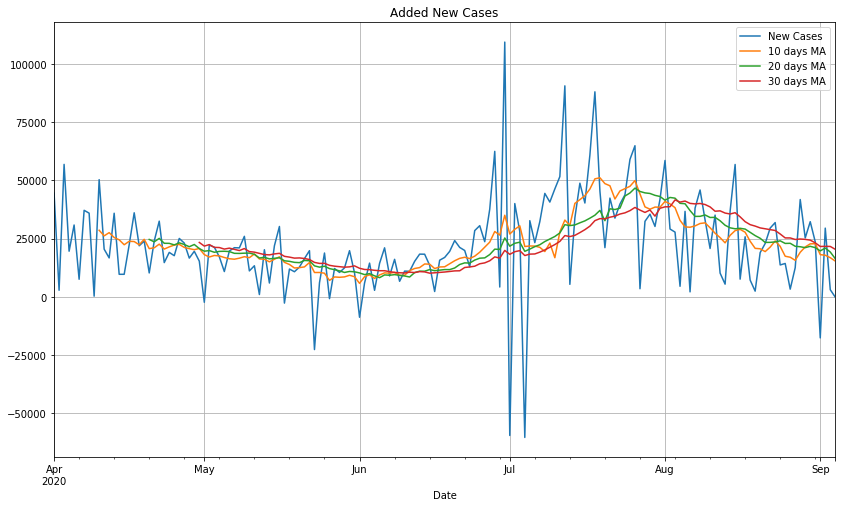

Date
2020-08-26     3251
2020-08-27    12495
2020-08-28    41788
2020-08-29    25273
2020-08-30    32260
2020-08-31    23603
2020-09-01   -17711
2020-09-02    29487
2020-09-03     3007
2020-09-04     -185
dtype: int64

In [60]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


def growth(ser):
    # returning array
    new = pd.Series(ser.iloc[1:].array)
    old = pd.Series(ser.iloc[:-1].array)]:
    delta = new - old
    return delta.iloc[:].array



cvusa = pd.read_csv('cv-dev-usa.csv', parse_dates=True, index_col=0)

confirmed = cvusa.Confirmed
confirmed_new = pd.Series(growth(cvusa.Confirmed), index=confirmed.index[1:])
dead_new = pd.Series(growth(cvusa.Dead), index=confirmed.index[1:])
recovered_new = pd.Series(growth(cvusa.Recovered), index=confirmed.index[1:])

growth = confirmed_new - (dead_new + recovered_new)
]:
growth.plot(figsize=(14, 8), title="Added New Cases", legend=True, label="New Cases") 
growth.rolling(10).mean().plot(grid=True, legend=True, label="10 days MA")
growth.rolling(20).mean().plot(grid=True, legend=True, label="20 days MA")
growth.rolling(30).mean().plot(grid=True, legend=True, label="30 days MA")
plt.show()
growth.tail(10)


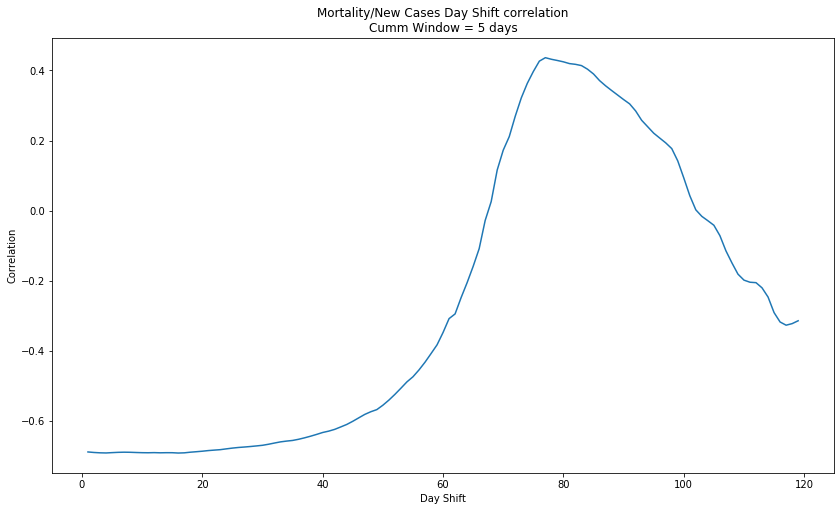

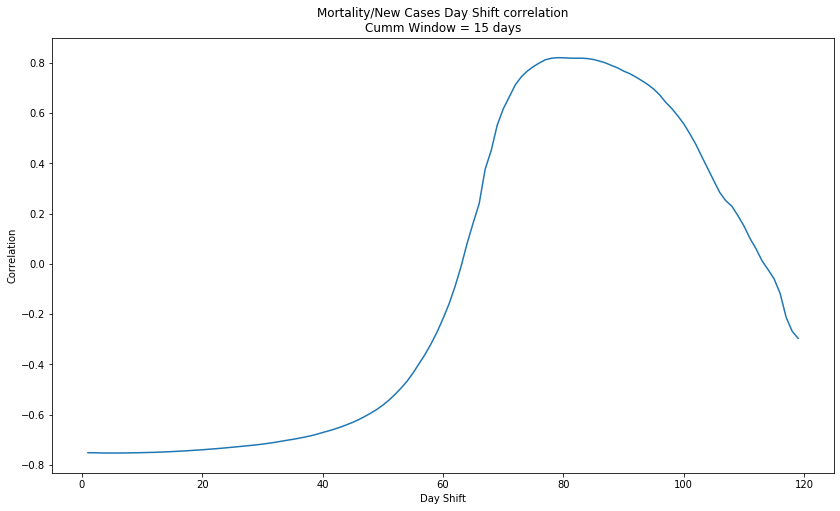

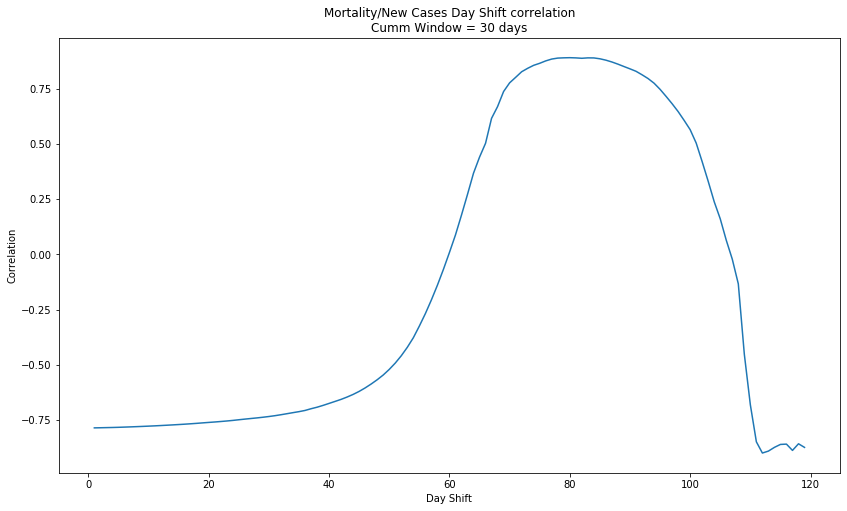

In [145]:
# New Cases -> Deathes Correlation
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# Mortality to confirmed after offsetDays and for cumm_wnd_days
def calcCorrelation(confirmed : pd.Series
                             , dead : pd.Series
                             , cumm_wnd_days : int
                             , days_shift : int):
    # accumulate total confirmed during that "cumm_wnd_days" days
    cumm_conf = (confirmed - confirmed.shift(cumm_wnd_days)).dropna().tshift(days_shift)

    # death accumulate for same windows but "offsetDays" later
    dead_shift = dead.shift(days_shift)
    cumm_dead = (dead_shift -  dead_shift.shift(cumm_wnd_days)).dropna()

    ratio = cumm_dead * 100 / cumm_conf
    return ratio.corr(cumm_conf) 


def plot_correlation_chart(confirmed : pd.Series
                          , dead : pd.Series
                          , cum_wnd_days):
    after_days_arr = range(1, 120)
    corr_arr = [calcCorrelation(confirmed, dead, cum_wnd_days, after_days) 
               for after_days in after_days_arr]
    correlation = pd.DataFrame(data={'Correlation': corr_arr}, index=after_days_arr)
    correlation.plot(figsize=(14, 8)
                     , title=f"Mortality/New Cases Day Shift correlation\nCumm Window = {cum_wnd_days} days"
                     , legend=False, label="Correlation") 
    plt.ylabel("Correlation")
    plt.xlabel("Day Shift")
    plt.show()
    

# --- main
cvusa = pd.read_csv('cv-dev-usa.csv', parse_dates=True, index_col=0)

confirmed = cvusa["Confirmed"]
dead = cvusa["Dead"]

for cum_wnd_days in [5, 15, 30]:
    plot_correlation_chart(confirmed, dead, cum_wnd_days)


